In [238]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsapi

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")

In [239]:
df = pd.read_csv('stats.csv')

In [240]:
df=df.drop(columns='Unnamed: 23')

In [241]:
df.head(5).T

0        1        2          3       4
last_name              Pujols  Cabrera   Molina       Cano  Suzuki
 first_name            Albert   Miguel   Yadier   Robinson    Kurt
player_id              405395   408234   425877     429664  435559
year                     2022     2022     2022       2022    2022
player_age                 42       39       39         39      38
b_ab                      185      335      169        100     116
b_total_pa                212      368      174        104     130
b_total_hits               46       89       36         15      22
b_single                   27       76       29         13      15
b_double                    9        9        5          1       4
b_triple                    0        0        0          0       0
b_home_run                 10        4        2          1       3
b_strikeout                34       85       29         25      25
b_walk                     18       25        4          4      11
on_base_plus_slg        0.785    0.646    0.514      0.373   0.563
b_rbi                      30       37       12          4      13
b_lob                      99      118       65         50      45
b_total_bases              85      110       47         19      35
pitch_count               850     1360      626        382     483
pull_percent             51.0     31.8     38.6       38.7    44.1
straightaway_percent     29.0     39.2     37.9       24.0    39.8
opposite_percent         20.0     29.0     23.6       37.3    16.1
batted_ball               155      255      140         75      93

In [242]:
df.columns = ['last','first','id','year','age','ab','pa','hits','single','double','triple','hr','so','walk','ops','rbi','lob','tb','pitches_faced','pull','center','oppo','batted']

In [243]:
df['name'] = df['first'].map(str) + ' ' + df['last'].map(str)

In [244]:
df2 = pd.read_csv('value.csv')

In [245]:
df2.columns = ['name','team','raa','waa','owar','salary','playerid','year']

In [246]:
df2 = df2.drop(index=0)

In [247]:
df2.sort_values(by=['name','year'])

name team  raa  waa owar       salary   playerid  year
744    A.J. Alexy  TEX    0  NaN  NaN          NaN  alexyaj01  2021
5164    A.J. Cole  2TM    2  0.2  0.2    $555,300    coleaj01  2018
3767    A.J. Cole  CLE    0  NaN  NaN          NaN   coleaj01  2019
2454    A.J. Cole  TOR    0  NaN  NaN    $100,000    coleaj01  2020
982     A.J. Cole  TOR    0    0    0  $1,000,000    coleaj01  2021
...           ...  ...  ...  ...  ...          ...        ...   ...
5984  Zac Rosscup  LAD    0    0    0          NaN  rosscza01  2018
4602  Zac Rosscup  3TM    0    0    0    $610,000   rosscza01  2019
1890  Zac Rosscup  COL    0    0    0          NaN  rosscza01  2021
3512          NaN  NaN  NaN  NaN  NaN          NaN        NaN   NaN
4923          NaN  NaN  NaN  NaN  NaN          NaN        NaN   NaN

[6302 rows x 8 columns]

In [248]:
df2

name team raa   waa owar        salary   playerid  year
1           Aaron Judge  NYY  53   5.5  6.9  $19,000,000   judgeaa01  2022
2      Paul Goldschmidt  STL  45   4.6    6  $26,000,000   goldspa01  2022
3          Austin Riley  ATL  30   3.2  4.9           NaN  rileyau01  2022
4         Manny Machado  SDP  32   3.3  4.9  $32,000,000   machama01  2022
5            Juan Soto*  2TM  28     3  4.7  $17,100,000    sotoju01  2022
...                 ...  ...  ..   ...  ...           ...        ...   ...
6298    Bradley Zimmer*  CLE  -3  -0.3  0.1     $551,200   zimmebr01  2018
6299     Ryan Zimmerman  WSN   7   0.6  1.2  $14,000,000   zimmery01  2018
6300  Jordan Zimmermann  DET   0     0    0  $24,000,000   zimmejo02  2018
6301       Ben Zobrist#  CHC  20   1.9  2.7  $16,500,000   zobribe01  2018
6302        Mike Zunino  SEA   3   0.5    1   $2,975,000   zuninmi01  2018

[6302 rows x 8 columns]

In [249]:
df2.name = df2.name.str.strip(' ').str.strip('*')
df2.name = df2.name.str.replace('.','')
df2.name = df2.name.str.replace('\xa0',' ')

In [250]:
df = df.sort_values(by=['name','year']).reset_index()

In [251]:
df.sort_values(by=['name','year'])

index     last  first      id  year  age   ab   pa  hits  single  ...  \
0      1927    Ellis   A.J.  454560  2018   37  151  183    41      32  ...   
1      2195  Pollock     AJ  572041  2018   30  413  460   106      59  ...   
2      2841  Pollock     AJ  572041  2019   31  308  342    82      51  ...   
3       757  Pollock     AJ  572041  2020   32  196  210    54      29  ...   
4      1310  Pollock     AJ  572041  2021   33  384  422   114      65  ...   
...     ...      ...    ...     ...   ...  ...  ...  ...   ...     ...  ...   
3284   2566  Greinke   Zack  425844  2019   35   50   56    14       6  ...   
3285   1818    Short   Zack  670097  2021   26  156  184    22      12  ...   
3286   2154  Wheeler   Zack  554430  2018   28   56   60    11       9  ...   
3287   2807  Wheeler   Zack  554430  2019   29   57   64    12       9  ...   
3288   1286  Wheeler   Zack  554430  2021   31   68   73    11       9  ...   

        ops  rbi  lob   tb  pitches_faced  pull  center  oppo  batted  \
0     0.716   15   65   52            793  37.8    36.1  26.1     119   
1     0.799   65  178  200           1720  44.5    35.8  19.6     321   
2     0.795   47  136  144           1250  42.0    39.5  18.5     238   
3     0.881   34   76  111            746  43.1    30.1  26.8     153   
4     0.892   69  163  206           1465  38.2    39.2  22.5     306   
...     ...  ...  ...  ...            ...   ...     ...   ...     ...   
3284  0.866    8   17   29            177  35.7    33.3  31.0      42   
3285  0.521   20   87   44            801  39.8    33.0  27.2     103   
3286  0.415    4   27   13            194  35.9    35.9  28.2      39   
3287  0.548    6   23   17            215  26.8    43.9  29.3      41   
3288  0.342    3   25   13            273  17.6    38.2  44.1      34   

               name  
0        A.J. Ellis  
1        AJ Pollock  
2        AJ Pollock  
3        AJ Pollock  
4        AJ Pollock  
...             ...  
3284   Zack Greinke  
3285     Zack Short  
3286   Zack Wheeler  
3287   Zack Wheeler  
3288   Zack Wheeler  

[3289 rows x 25 columns]

In [252]:
df2.year = df2.year.replace(np.NaN,0)
df2.year = df2.year.astype('int64')

In [253]:
df2 = df2.sort_values(by=['name','year']).reset_index()

In [254]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6302 entries, 0 to 6301
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     6302 non-null   int64 
 1   name      6300 non-null   object
 2   team      6300 non-null   object
 3   raa       6300 non-null   object
 4   waa       5262 non-null   object
 5   owar      5247 non-null   object
 6   salary    3023 non-null   object
 7   playerid  6300 non-null   object
 8   year      6302 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 443.2+ KB


In [255]:
df.name=df.name.str.strip(' ').str.replace('.','')

In [256]:
players = df.name.tolist()

In [257]:
df2[df2.name.isin(players)]

index          name team raa   waa owar        salary   playerid  year
5      5274      AJ Ellis  SDP  -2  -0.3  0.8   $1,250,000   ellisaj01  2018
10     5883    AJ Pollock  ARI   9   0.7  2.1   $7,750,000   polloaj01  2018
11     4498    AJ Pollock  LAD  -9    -1  1.3   $4,000,000   polloaj01  2019
12     3143    AJ Pollock  LAD   2   0.2  1.2  $15,000,000   polloaj01  2020
13     1783    AJ Pollock  LAD  17   1.6  2.9  $18,000,000   polloaj01  2021
...     ...           ...  ...  ..   ...  ...           ...        ...   ...
6294    395    Zack Short  DET   1   0.1    0           NaN  shortza01  2022
6296   6250  Zack Wheeler  NYM   2   0.2  0.3   $1,900,000   wheelza01  2018
6297   4866  Zack Wheeler  NYM   7   0.6  0.6   $5,975,000   wheelza01  2019
6298   3463  Zack Wheeler  PHI   0   NaN  NaN  $21,500,000   wheelza01  2020
6299   2163  Zack Wheeler  PHI   1   0.1  0.1  $22,500,000   wheelza01  2021

[3269 rows x 9 columns]

In [258]:
df = pd.merge(df,df2,on=['name','year'], how='left')

In [259]:
df.salary = df.salary.str.strip('$').str.replace(',','')

In [260]:
df['impact'] = ((df.single+(df.double*2)+(df.triple*3)+(df.hr*4)+df.walk+df.rbi)-(df.so+df.lob))/df.pa

In [261]:
df['ppa'] = df.pitches_faced/df.pa

In [262]:
df['ppb'] = df.pitches_faced/df.tb

In [263]:
df=df.drop(columns='index_y')

In [264]:
df= df.dropna(subset=['team'])
#df=df[df.pa>50]

In [298]:
cols = ['raa','waa','owar','salary']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [265]:
train, validate = train_test_split(df, random_state=123)
train, test = train_test_split(train, random_state=123)

In [266]:
med_sal = train.salary.median()
train.salary = train.salary.replace(np.NaN,med_sal)
validate.salary = validate.salary.replace(np.NaN,med_sal)
test.salary = test.salary.replace(np.NaN,med_sal)

In [267]:
train.sort_values(by=['impact'],ascending=False)

index_x       last     first      id  year  age   ab   pa  hits  single  \
3077     3058     Taylor    Tyrone  621438  2019   25   10   12     4       2   
2374     1715     Fortes      Nick  663743  2021   24   31   34     9       5   
1059      669    Freeman   Freddie  518692  2020   30  214  262    73      36   
2707     2765  Lavarnway      Ryan  543432  2019   31   18   19     5       1   
196      1065  Stevenson    Andrew  664057  2020   26   41   47    15       5   
...       ...        ...       ...     ...   ...  ...  ...  ...   ...     ...   
141      3209    Jackson      Alex  656577  2019   23   13   15     0       0   
213      1879    Sanchez    Anibal  434671  2018   34   41   44     1       1   
2752     2519  Alcantara     Sandy  645261  2018   22   12   13     0       0   
2754     1618  Alcantara     Sandy  645261  2021   25   58   64     2       1   
1212     1766   Anderson       Ian  666120  2021   23   37   41     2       1   

      ...              name  team  raa   waa  owar     salary   playerid  \
3077  ...     Tyrone Taylor   MIL    1     0   0.2  3306000.0  tayloty01   
2374  ...       Nick Fortes   MIA    1   0.1   0.4  3306000.0  forteni01   
1059  ...   Freddie Freeman   ATL   25   2.5   3.2  22000000   freemfr01   
2707  ...    Ryan Lavarnway   CIN    2   0.1   0.2  3306000.0  lavarry01   
196   ...  Andrew Stevenson   WSN    7   0.7   0.8  3306000.0  stevean01   
...   ...               ...   ...  ...   ...   ...        ...        ...   
141   ...      Alex Jackson   ATL   -4  -0.4  -0.3  3306000.0  jacksal02   
213   ...    Anibal Sanchez   ATL   -4  -0.4  -0.4   1000000   sanchan01   
2752  ...   Sandy Alcantara   MIA   -1  -0.1  -0.1  3306000.0  alcansa01   
2754  ...   Sandy Alcantara   MIA   -2  -0.3  -0.2  3306000.0  alcansa01   
1212  ...      Ian Anderson   ATL   -2  -0.2  -0.2  3306000.0  anderia01   

        impact       ppa         ppb  
3077  0.500000  3.583333    7.166667  
2374  0.470588  3.911765    6.333333  
1059  0.450382  3.896947    7.452555  
2707  0.421053  3.894737    5.692308  
196   0.404255  4.063830    6.366667  
...        ...       ...         ...  
141  -1.200000  2.533333         inf  
213  -1.204545  3.477273  153.000000  
2752 -1.230769  3.384615         inf  
2754 -1.250000  4.187500   89.333333  
1212 -1.292683  3.560976   48.666667  

[1599 rows x 34 columns]

<AxesSubplot:xlabel='hr', ylabel='impact'>

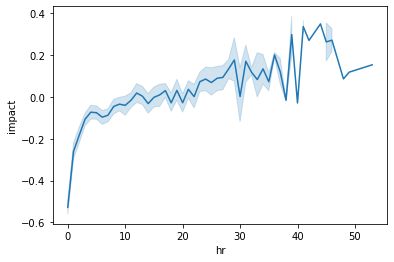

In [268]:
sns.lineplot(x='hr',y='impact', data= train)

<AxesSubplot:xlabel='ppb', ylabel='impact'>

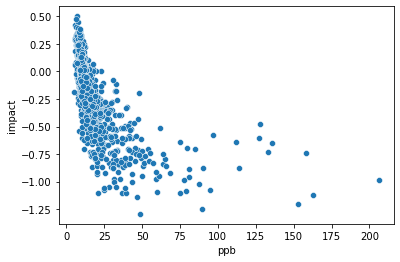

In [269]:
sns.scatterplot(data=train, x='ppb',y='impact')

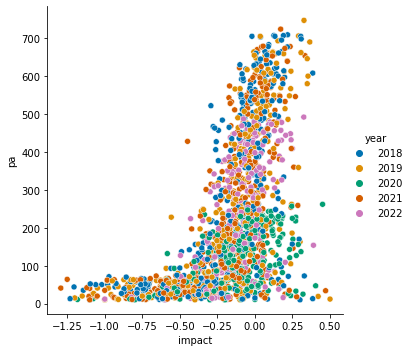

In [270]:
sns.relplot(data=train, x='impact', y='pa', hue='year', palette='colorblind')

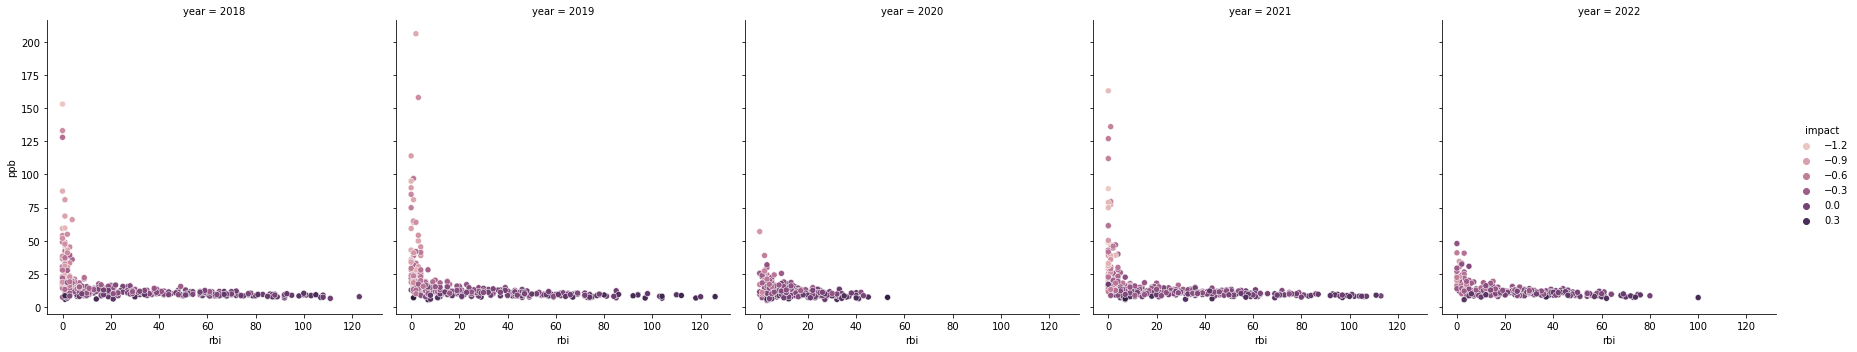

In [292]:
sns.relplot(data=train, x='rbi', y='ppb', col='year', hue='impact')

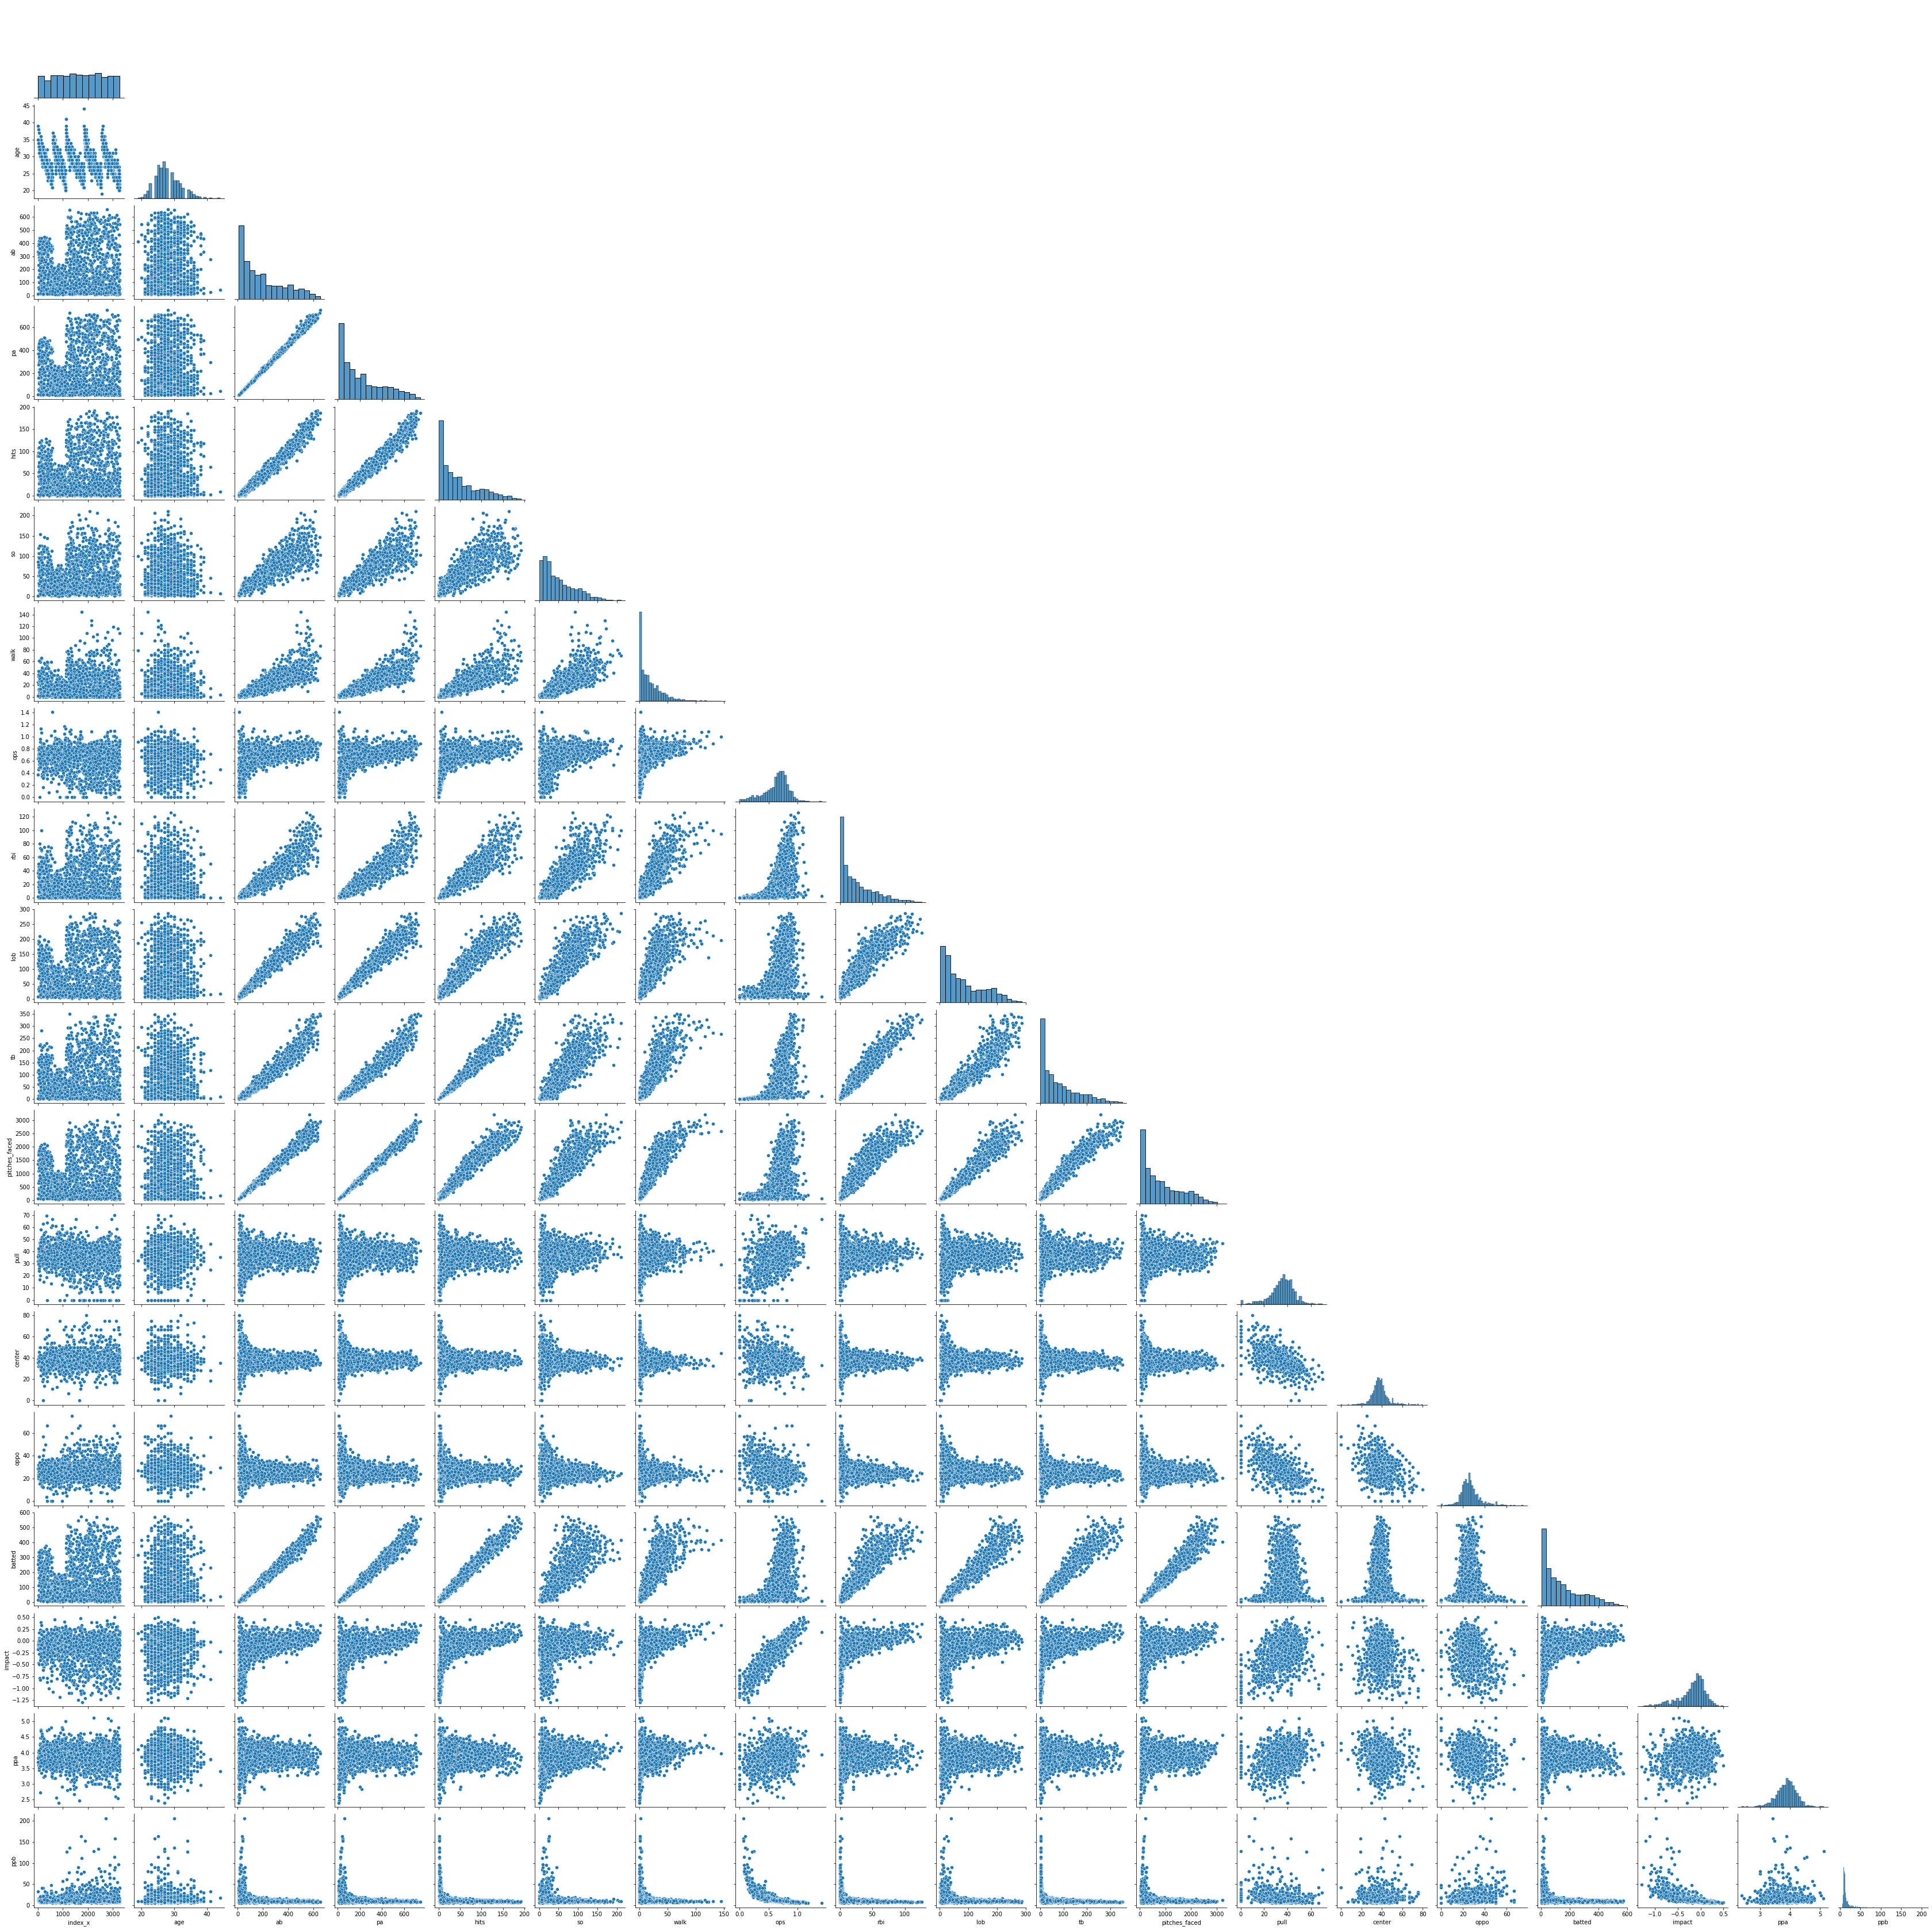

In [272]:
sns.pairplot(train.drop(columns=['last','first','id','year','single','double','triple','hr']),corner=True)

In [308]:
continuous= train.drop(columns=['index_x','last','first','id','name','team','playerid']).columns.tolist()

In [310]:
cols = ['raa','waa','owar','salary']
train[cols] = train[cols].apply(pd.to_numeric, errors='coerce')

In [312]:
train = train.dropna()

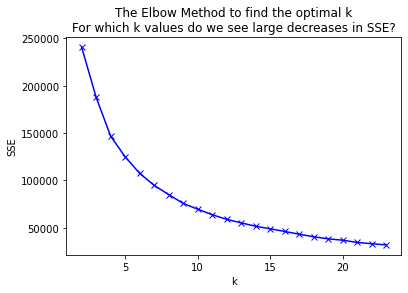

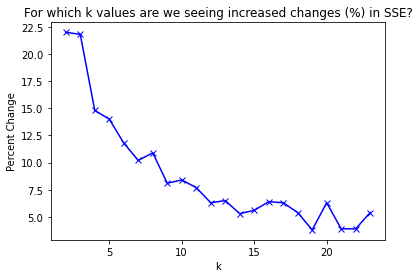

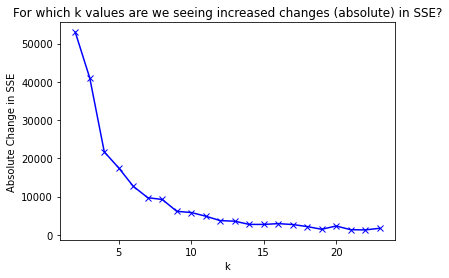

In [316]:
cluster_vars=['pull','center','oppo']
cluster_name = 'tendency'
k_range = range(2,25)

def find_k(train_scaled, cluster_vars, k_range):
    sse = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k)

        # X[0] is our X_train dataframe..the first dataframe in the list of dataframes stored in X. 
        kmeans.fit(train[cluster_vars])

        # inertia: Sum of squared distances of samples to their closest cluster center.
        sse.append(kmeans.inertia_) 

    # compute the difference from one k to the next
    delta = [round(sse[i] - sse[i+1],0) for i in range(len(sse)-1)]

    # compute the percent difference from one k to the next
    pct_delta = [round(((sse[i] - sse[i+1])/sse[i])*100, 1) for i in range(len(sse)-1)]

    # create a dataframe with all of our metrics to compare them across values of k: SSE, delta, pct_delta
    k_comparisons_df = pd.DataFrame(dict(k=k_range[0:-1], 
                             sse=sse[0:-1], 
                             delta=delta, 
                             pct_delta=pct_delta))

    # plot k with inertia
    plt.plot(k_comparisons_df.k, k_comparisons_df.sse, 'bx-')
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.title('The Elbow Method to find the optimal k\nFor which k values do we see large decreases in SSE?')
    plt.show()

    # plot k with pct_delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.pct_delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Percent Change')
    plt.title('For which k values are we seeing increased changes (%) in SSE?')
    plt.show()

    # plot k with delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Absolute Change in SSE')
    plt.title('For which k values are we seeing increased changes (absolute) in SSE?')
    plt.show()

find_k(train,cluster_vars,k_range)   


In [321]:
kmeans = KMeans(n_clusters = 3, random_state=123)
kmeans.fit(train[cluster_vars])
train["tendency"] = kmeans.predict(train[cluster_vars])
validate["tendency"] = kmeans.predict(validate[cluster_vars])
test["tendency"] = kmeans.predict(test[cluster_vars])

train.head()

index_x    last     first      id  year  age   ab   pa  hits  single  \
1487      471   Adell        Jo  666176  2022   23  162  173    37      24   
2689     2572  Martin   Russell  431145  2019   36  209  249    46      35   
1727     1797   Rojas      Josh  668942  2021   27  484  550   128      82   
41       1372  Duvall      Adam  594807  2021   32  513  555   117      60   
1637     1199  Altuve      Jose  514888  2021   31  601  678   167     103   

      ...  team  raa  waa  owar      salary   playerid    impact       ppa  \
1487  ...   LAA  -11 -1.2  -0.2   3306000.0  adelljo01 -0.335260  4.202312   
2689  ...   LAD    0 -0.1   0.6  20000000.0  martiru01 -0.120482  4.281124   
1727  ...   ARI   -9 -1.1   2.6   3306000.0  rojasjo01 -0.054545  4.210909   
41    ...   2TM   13  1.2   1.2   3306000.0  duvalad01 -0.012613  3.888288   
1637  ...   HOU   23  2.4   4.7  29000000.0  altuvjo01  0.234513  3.671091   

            ppb  tendency  
1487  12.534483         1  
2689  15.449275         1  
1727  11.638191         0  
41     8.563492         1  
1637   8.465986         1  

[5 rows x 35 columns]

<AxesSubplot:xlabel='pull', ylabel='owar'>

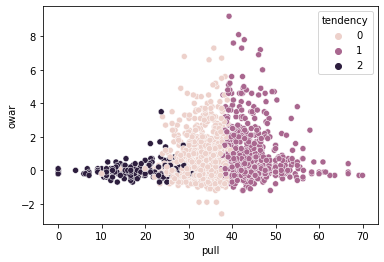

In [330]:
sns.scatterplot(data=train,x='pull',y='owar',hue='tendency')

<AxesSubplot:xlabel='tendency', ylabel='waa'>

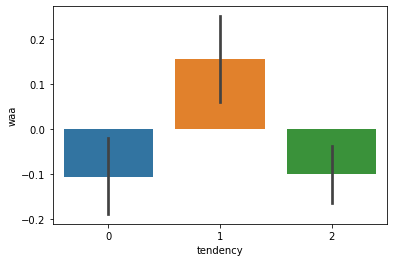

In [338]:
sns.barplot(data=train,x='tendency',y='waa')

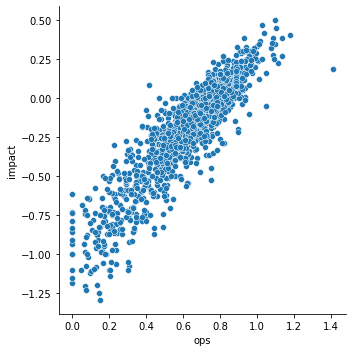

In [367]:
sns.relplot(data=train,x='ops',y='impact')


In [273]:
Catcher=("Austin Barnes, Tucker Barnhart, Curt Casali, Jason Castro, Robinson Chirinos, Willson Contreras, Austin Hedges, Andrew Knapp, Martín Maldonado, Omar Narváez, Roberto Pérez, Kevin Plawecki, Gary Sánchez, Kurt Suzuki, Christian Vázquez, Stephen Vogt, Mike Zunino").split(',')
First_base=("José Abreu, Jesús Aguilar, Josh Bell, Brandon Belt, Yuli Gurriel, Eric Hosmer (opt-out), Trey Mancini, Max Muncy (club option), Albert Pujols, Anthony Rizzo (player option), Miguel Sanó (club option), Carlos Santana, Daniel Vogelbach (club option)").split(',')
Second_base= ("Hanser Alberto, Brandon Drury, Adam Frazier, Marwin Gonzalez, Josh Harrison (club option), César Hernández, Kiké Hernández, Jed Lowrie, Rougned Odor, Jace Peterson, Jonathan Schoop (opt-out), Jean Segura (club option), Donovan Solano, Kolten Wong (club option)").split(',')
Third_base= ("Ehire Adrianza, Aledmys Díaz, Matt Duffy, Wilmer Flores, Maikel Franco, Evan Longoria (club option), Justin Turner (club option)").split(',')
Shortstop= ("Tim Anderson (club option), Elvis Andrus (player option), Xander Bogaerts (opt-out), Carlos Correa (opt-out), Didi Gregorius, José Iglesias, Andrelton Simmons, Dansby Swanson, Trea Turner, Jonathan Villar").split(',')
Outfield= ("Andrew Benintendi, Charlie Blackmon (player option), Jackie Bradley Jr., Michael Brantley, Lorenzo Cain, Kole Calhoun (club option), Alex Dickerson, Corey Dickerson, Adam Duvall, Joey Gallo, Ben Gamel, Robbie Grossman, Mitch Haniger, Odúbel Herrera, Aaron Judge, Kevin Kiermaier (club option), Manuel Margot, Jake Marisnick, Andrew McCutchen, Wil Myers (club option), Tyler Naquin, Brandon Nimmo, Joc Pederson, David Peralta, Tommy Pham (mutual option), Chad Pinder, Stephen Piscotty (club option), A.J. Pollock (club option), Jurickson Profar (player option), Jorge Soler (opt-out), Justin Upton").split(',')
Designated_hitter= ("Nelson Cruz (mutual option), J.D. Martinez").split(',')

In [274]:
catcher_fa = [i for i in Catcher if not i.endswith(')')]
first_fa = [i for i in First_base if not i.endswith(')')]
second_fa = [i for i in Second_base if not i.endswith(')')]
third_fa = [i for i in Third_base if not i.endswith(')')]
short_fa = [i for i in Shortstop if not i.endswith(')')]
outfield_fa = [i for i in Outfield if not i.endswith(')')]
dh_fa = [i for i in Designated_hitter if not i.endswith(')')]

In [275]:
big_list = [catcher_fa,first_fa,second_fa,third_fa,short_fa,outfield_fa,dh_fa]

In [276]:
def make_df(i):
    i = pd.DataFrame(i)
    i.columns = ['name']
    i.name = i.name.str.strip(' ')
    return i

In [277]:
catchers= make_df(catcher_fa)
first= make_df(first_fa)
second= make_df(second_fa)
third= make_df(third_fa)
short= make_df(short_fa)
outfield= make_df(outfield_fa)
dh= make_df(dh_fa)

In [278]:
df.name = df.name.str.strip(' ')

In [279]:
catchers

name
0       Austin Barnes
1     Tucker Barnhart
2         Curt Casali
3        Jason Castro
4   Robinson Chirinos
5   Willson Contreras
6       Austin Hedges
7        Andrew Knapp
8    Martín Maldonado
9        Omar Narváez
10      Roberto Pérez
11     Kevin Plawecki
12       Gary Sánchez
13        Kurt Suzuki
14  Christian Vázquez
15       Stephen Vogt
16        Mike Zunino

In [280]:
#orioles = 

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2844 entries, 0 to 3297
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index_x        2844 non-null   int64  
 1   last           2844 non-null   object 
 2   first          2844 non-null   object 
 3   id             2844 non-null   int64  
 4   year           2844 non-null   int64  
 5   age            2844 non-null   int64  
 6   ab             2844 non-null   int64  
 7   pa             2844 non-null   int64  
 8   hits           2844 non-null   int64  
 9   single         2844 non-null   int64  
 10  double         2844 non-null   int64  
 11  triple         2844 non-null   int64  
 12  hr             2844 non-null   int64  
 13  so             2844 non-null   int64  
 14  walk           2844 non-null   int64  
 15  ops            2844 non-null   float64
 16  rbi            2844 non-null   int64  
 17  lob            2844 non-null   int64  
 18  tb      

In [282]:
catchers= df[df['name'].isin(catchers.name)]
first =df[df['name'].isin(first.name)]
second = df[df['name'].isin(second.name)]
third = df[df['name'].isin(third.name)]
short = df[df['name'].isin(short.name)]
outfield = df[df['name'].isin(outfield.name)]
dh = df[df['name'].isin(dh.name)]

In [283]:
catchers

index_x       last      first      id  year  age   ab   pa  hits  \
259      2327     Barnes     Austin  605131  2018   28  200  238    41   
260      2967     Barnes     Austin  605131  2019   29  212  242    43   
261       842     Barnes     Austin  605131  2020   30   86  104    21   
262      1413     Barnes     Austin  605131  2021   31  200  225    43   
263       182     Barnes     Austin  605131  2022   32  117  139    20   
273      2296     Hedges     Austin  595978  2018   25  303  326    70   
274      2935     Hedges     Austin  595978  2019   26  312  347    55   
275       820     Hedges     Austin  595978  2020   27   69   83    10   
276      1385     Hedges     Austin  595978  2021   28  286  312    51   
277       162     Hedges     Austin  595978  2022   29  207  238    37   
704      2224     Casali       Curt  592200  2018   29  140  156    41   
705      2867     Casali       Curt  592200  2019   30  207  236    52   
706       777     Casali       Curt  592200  2020   31   76   93    17   
707      1329     Casali       Curt  592200  2021   32  200  231    42   
708       132     Casali       Curt  592200  2022   33  110  129    25   
1385     1994     Castro      Jason  488771  2018   31   63   74     9   
1386     2658     Castro      Jason  488771  2019   32  237  275    55   
1387      641     Castro      Jason  488771  2020   33   80   92    15   
1388     1176     Castro      Jason  488771  2021   34  149  179    35   
1389       24     Castro      Jason  488771  2022   35   78   88     9   
1838     2395   Plawecki      Kevin  608700  2018   27  238  277    50   
1839     3034   Plawecki      Kevin  608700  2019   28  158  174    35   
1840      883   Plawecki      Kevin  608700  2020   29   82   89    28   
1841     1472   Plawecki      Kevin  608700  2021   30  157  173    45   
1842      220   Plawecki      Kevin  608700  2022   31  123  138    20   
1869     1887     Suzuki       Kurt  435559  2018   34  347  388    94   
1870     2583     Suzuki       Kurt  435559  2019   35  280  309    74   
1871      598     Suzuki       Kurt  435559  2020   36  111  129    30   
1872     1126     Suzuki       Kurt  435559  2021   37  219  247    49   
1873        4     Suzuki       Kurt  435559  2022   38  116  130    22   
2303     2203     Zunino       Mike  572287  2018   27  373  405    75   
2304     2847     Zunino       Mike  572287  2019   28  266  289    44   
2305      762     Zunino       Mike  572287  2020   29   75   84    11   
2306     1316     Zunino       Mike  572287  2021   30  333  375    72   
2307      122     Zunino       Mike  572287  2022   31  115  123    17   
2645     1930   Chirinos   Robinson  455139  2018   34  360  426    80   
2646     2613   Chirinos   Robinson  455139  2019   35  366  437    87   
2647      614   Chirinos   Robinson  455139  2020   36   74   82    12   
2648     1145   Chirinos   Robinson  455139  2021   37   97  112    22   
2649       12   Chirinos   Robinson  455139  2022   38  155  176    28   
2845     2724       Vogt    Stephen  519390  2019   34  255  280    67   
2846      681       Vogt    Stephen  519390  2020   35   72   81    12   
2847     1223       Vogt    Stephen  519390  2021   36  210  238    41   
2848       51       Vogt    Stephen  519390  2022   37  105  121    16   
3021     2166   Barnhart     Tucker  571466  2018   27  460  522   114   
3022     2818   Barnhart     Tucker  571466  2019   28  316  364    73   
3023      742   Barnhart     Tucker  571466  2020   29   98  110    20   
3024     1293   Barnhart     Tucker  571466  2021   30  348  388    86   
3025      104   Barnhart     Tucker  571466  2022   31  203  219    40   
3167     2212  Contreras    Willson  575929  2018   26  474  544   118   
3168     2857  Contreras    Willson  575929  2019   27  360  409    98   
3169      770  Contreras    Willson  575929  2020   28  189  225    46   
3170     1323  Contreras    Willson  575929  2021   29  413  483    98   
3171      

In [284]:
catcher_suggestions = catchers.groupby('name').impact.agg('mean').sort_values(ascending=False)
first_suggestions = first.groupby('name').impact.agg('mean').sort_values(ascending=False)
second_suggestions = second.groupby('name').impact.agg('mean').sort_values(ascending=False)
third_suggestions = third.groupby('name').impact.agg('mean').sort_values(ascending=False)
short_suggestions = short.groupby('name').impact.agg('mean').sort_values(ascending=False)
outfield_suggestions = outfield.groupby('name').impact.agg('mean').sort_values(ascending=False)
dh_suggestions = dh.groupby('name').impact.agg('mean').sort_values(ascending=False)


<AxesSubplot:xlabel='impact', ylabel='name'>

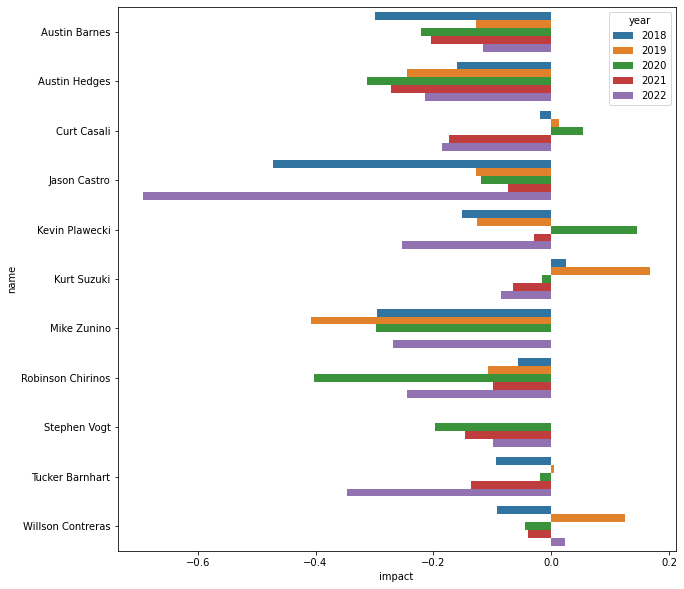

In [285]:
plt.figure(figsize=(10,10))
sns.barplot(data=catchers, y='name',x='impact',hue='year')

<AxesSubplot:xlabel='impact', ylabel='name'>

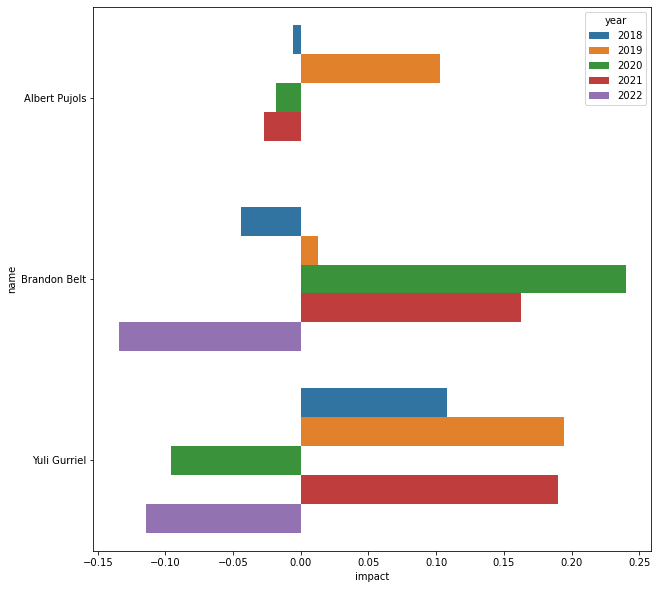

In [286]:
plt.figure(figsize=(10,10))
sns.barplot(data=first, y='name',x='impact',hue='year')

<AxesSubplot:xlabel='impact', ylabel='name'>

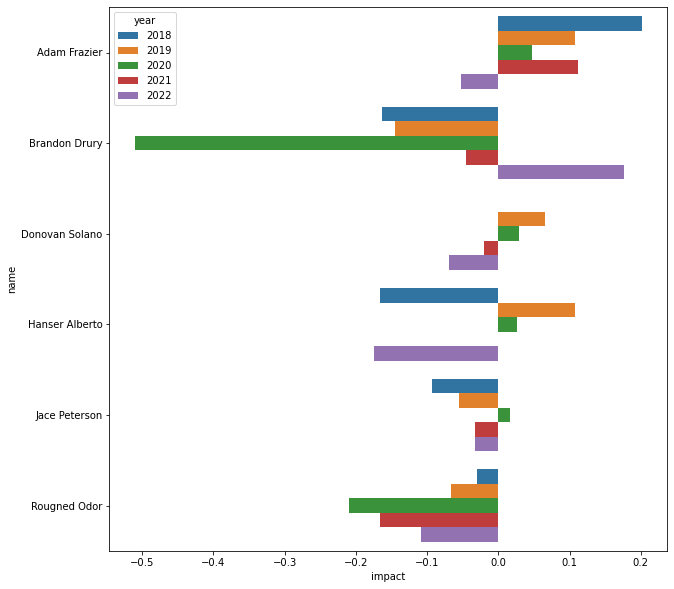

In [287]:
plt.figure(figsize=(10,10))
sns.barplot(data=second, y='name',x='impact',hue='year')

<AxesSubplot:xlabel='impact', ylabel='name'>

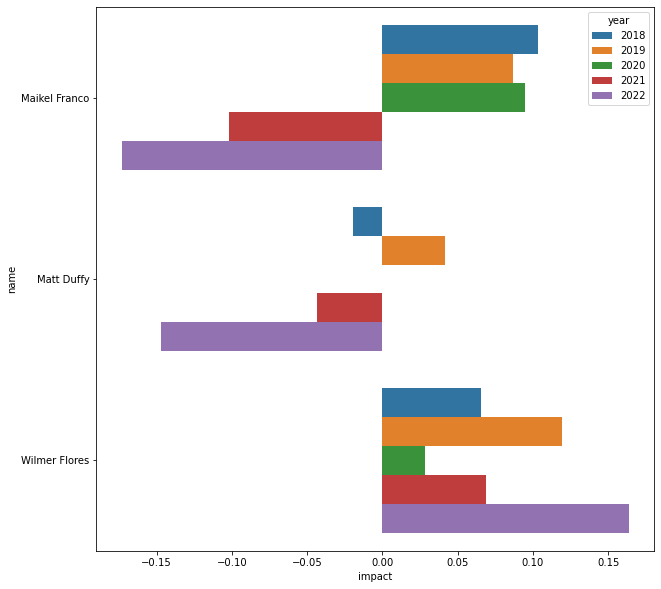

In [288]:
plt.figure(figsize=(10,10))
sns.barplot(data=third, y='name',x='impact',hue='year')

<AxesSubplot:xlabel='impact', ylabel='name'>

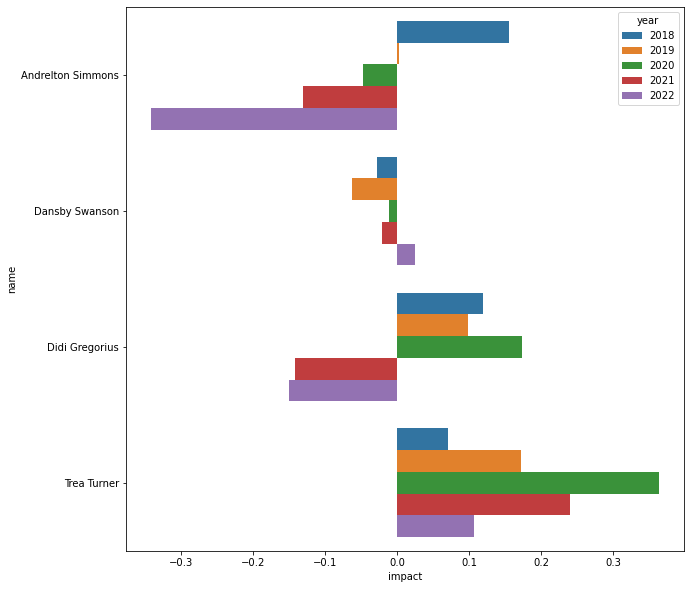

In [289]:
plt.figure(figsize=(10,10))
sns.barplot(data=short, y='name',x='impact',hue='year')

<AxesSubplot:xlabel='impact', ylabel='name'>

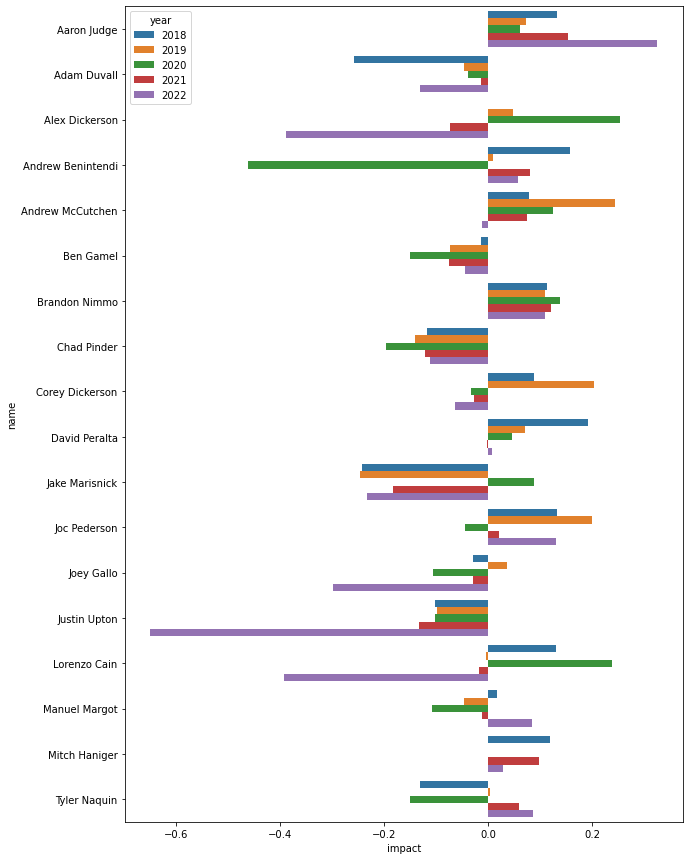

In [290]:
plt.figure(figsize=(10,15))
sns.barplot(data=outfield, y='name',x='impact',hue='year')

In [291]:
print("Catcher Suggestions",
     catcher_suggestions,
      '\n',
     "\nFirst Base Suggestions",
     first_suggestions,
      '\n',
     "\nSecond Base Suggestions",
     second_suggestions,
      '\n',
     "\nThird Base Suggestions",
     third_suggestions,
      '\n',
     '\nShortstop Suggestions',
     short_suggestions,
      '\n',
     '\nOutfield Suggestions',
     outfield_suggestions)

Catcher Suggestions name
Kurt Suzuki          0.005832
Willson Contreras   -0.005427
Curt Casali         -0.062392
Kevin Plawecki      -0.082904
Stephen Vogt        -0.110941
Tucker Barnhart     -0.118037
Robinson Chirinos   -0.181772
Austin Barnes       -0.193425
Austin Hedges       -0.240888
Mike Zunino         -0.254103
Jason Castro        -0.297124
Name: impact, dtype: float64 
 
First Base Suggestions name
Yuli Gurriel     0.056544
Brandon Belt     0.047507
Albert Pujols    0.010259
Name: impact, dtype: float64 
 
Second Base Suggestions name
Adam Frazier      0.083098
Donovan Solano    0.001454
Jace Peterson    -0.039793
Hanser Alberto   -0.041467
Rougned Odor     -0.116130
Brandon Drury    -0.137506
Name: impact, dtype: float64 
 
Third Base Suggestions name
Wilmer Flores    0.089088
Maikel Franco    0.001892
Matt Duffy      -0.042139
Name: impact, dtype: float64 
 
Shortstop Suggestions name
Trea Turner          0.190360
Didi Gregorius       0.019664
Dansby Swanson      -0.0197